### Ali Darabi - 810100264
### Hesam Ramezanian - 810100248

# Data Science - Assignment 5

In [1]:
import numpy as np
import math
import pandas as pd
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score
import random
from tabulate import tabulate

# <span style="color:pink;">Tasks</span>

## <span style="color:cyan;">1. Preprocessing</span>

In [2]:
footBallDF = pd.read_csv("football.csv")
footBallDF.head()

,matchId,playerId,playType,bodyPart,x,y,interveningOpponents,interveningTeammates,interferenceOnShooter,minute,second,outcome
0,m_91,p_103,open play,right foot,13.47,-11.22,1,0,medium,70,9,goal
1,m_17,p_16,open play,left foot,9.48,14.22,3,0,medium,55,4,saved by keeper
2,m_111,p_88,free kick,left foot,29.43,-1.25,6,2,low,86,31,saved by keeper
3,m_142,p_87,open play,right foot,26.93,1.00,4,1,medium,77,2,missed chance
4,m_117,p_9,open play,right foot,10.72,5.24,2,0,medium,76,46,goal


In [3]:
footBallDF.describe()

,x,y,interveningOpponents,interveningTeammates,minute,second
count,8925.000000,8925.000000,8925.000000,8925.000000,8925.000000,8925.000000
mean,14.564631,0.364408,2.531989,0.336471,48.541401,29.243810
std,7.841865,8.999063,1.386693,0.680175,26.397998,17.306565
min,0.000000,-33.920000,0.000000,0.000000,0.000000,0.000000
25%,8.480000,-5.740000,2.000000,0.000000,26.000000,14.000000
50%,12.470000,0.500000,2.000000,0.000000,49.000000,29.000000
75%,20.950000,6.730000,3.000000,0.000000,71.000000,44.000000
max,70.820000,33.920000,11.000000,7.000000,98.000000,59.000000


In [4]:
footBallDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8925 entries, 0 to 8924
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   matchId                8925 non-null   object 
 1   playerId               8925 non-null   object 
 2   playType               8925 non-null   object 
 3   bodyPart               8925 non-null   object 
 4   x                      8925 non-null   float64
 5   y                      8925 non-null   float64
 6   interveningOpponents   8925 non-null   int64  
 7   interveningTeammates   8925 non-null   int64  
 8   interferenceOnShooter  8891 non-null   object 
 9   minute                 8925 non-null   int64  
 10  second                 8925 non-null   int64  
 11  outcome                8891 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 836.8+ KB


In [5]:
footBallDF.drop_duplicates(inplace=True)

In [6]:
footBallDF['matchId'] = footBallDF['matchId'].str.replace('m_', '').astype('int64')

footBallDF['playerId'] = footBallDF['playerId'].str.replace('p_', '').astype('int64')

<span style="color:pink">We convert the "matchId" and "PlayerId" columns to numerical format.</span>

In [7]:
footBallDF["playType"].unique()

array(['open play', 'free kick', 'penalty', 'olimpico'], dtype=object)

<span style="color:pink">We convert categorical columns to numerical columns using the labeling method.</span>

In [8]:
playTypeMap = {"open play": 1, "free kick": 2, "penalty": 3, "olimpico": 4}
footBallDF["playType"] = footBallDF["playType"].map(playTypeMap)
footBallDF["playType"].unique()

array([1, 2, 3, 4], dtype=int64)

In [9]:
footBallDF["bodyPart"].unique()

array(['right foot', 'left foot', 'head', 'other'], dtype=object)

In [10]:
bodyPartMap = {"right foot": 1, "left foot": 2, "head": 3, "other": 4}
footBallDF["bodyPart"] = footBallDF["bodyPart"].map(bodyPartMap)
footBallDF["bodyPart"].unique()

array([1, 2, 3, 4], dtype=int64)

In [11]:
footBallDF["interferenceOnShooter"].unique()   

array(['medium', 'low', 'high', nan], dtype=object)

In [12]:
interferenceOnShooterMap = {"low": 1, "medium": 2, "high": 3}
footBallDF["interferenceOnShooter"] = footBallDF["interferenceOnShooter"].map(interferenceOnShooterMap)
footBallDF["interferenceOnShooter"] = footBallDF["interferenceOnShooter"].fillna(-1)
footBallDF["interferenceOnShooter"] = footBallDF["interferenceOnShooter"].astype("int64")
footBallDF["interferenceOnShooter"].unique()

array([ 2,  1,  3, -1], dtype=int64)

In [13]:
footBallDF["outcome"].unique() 

array(['goal', 'saved by keeper', 'missed chance', 'blocked shot',
       'hit the post', nan], dtype=object)

In [14]:
outcomeMap = {"goal": 1, "saved by keeper": 2, "missed chance": 3, "blocked shot": 4, "hit the post": 5}
footBallDF["outcome"] = footBallDF["outcome"].map(outcomeMap)
footBallDF["outcome"] = footBallDF["outcome"].fillna(-1)
footBallDF["outcome"] = footBallDF["outcome"].astype("int64")
footBallDF["outcome"].unique()

array([ 1,  2,  3,  4,  5, -1], dtype=int64)

In [15]:
footBallDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8925 entries, 0 to 8924
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   matchId                8925 non-null   int64  
 1   playerId               8925 non-null   int64  
 2   playType               8925 non-null   int64  
 3   bodyPart               8925 non-null   int64  
 4   x                      8925 non-null   float64
 5   y                      8925 non-null   float64
 6   interveningOpponents   8925 non-null   int64  
 7   interveningTeammates   8925 non-null   int64  
 8   interferenceOnShooter  8925 non-null   int64  
 9   minute                 8925 non-null   int64  
 10  second                 8925 non-null   int64  
 11  outcome                8925 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 836.8 KB


<span style="color:pink">Now, we need to find a solution for missing values. There are a total of 34 rows where the "outcome" and "interferenceOnShooter" column values are missing. Since 34 is much smaller than the dataset size and the target column is missing, we have to drop these rows.</span>

In [16]:
len(footBallDF[footBallDF["interferenceOnShooter"] == -1])

34

In [17]:
footBallDF = footBallDF[footBallDF['outcome'] != -1]
footBallDF.reset_index(drop=True, inplace=True)
footBallDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8891 entries, 0 to 8890
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   matchId                8891 non-null   int64  
 1   playerId               8891 non-null   int64  
 2   playType               8891 non-null   int64  
 3   bodyPart               8891 non-null   int64  
 4   x                      8891 non-null   float64
 5   y                      8891 non-null   float64
 6   interveningOpponents   8891 non-null   int64  
 7   interveningTeammates   8891 non-null   int64  
 8   interferenceOnShooter  8891 non-null   int64  
 9   minute                 8891 non-null   int64  
 10  second                 8891 non-null   int64  
 11  outcome                8891 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 833.7 KB


In [18]:
len(footBallDF[footBallDF["interferenceOnShooter"] == -1])

0

In [19]:
X = footBallDF.drop(['outcome'], axis=1)
y = footBallDF['outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

model = DecisionTreeClassifier(random_state=11)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.33277121978639684


<span style="color:pink">Now we calculate the accuracy before following the preprocessing steps. We use a Decision Tree because our task is a classification problem, and we cannot use regression.</span>

In [20]:
footBallDF['outcome'] = footBallDF['outcome'].apply(lambda x: 2 if x != 1 else x)
footBallDF['outcome'].unique()

array([1, 2], dtype=int64)

<font color="pink">We convert all outcomes that are not goals to a single outcome because our task is to determine whether the shot is a goal or not.</font>

In [21]:
footBallDF['shotDistance'] = round(np.sqrt(footBallDF['x']**2 + footBallDF['y']**2))
footBallDF["shotDistance"] = footBallDF["shotDistance"].astype("int64")
footBallDF

,matchId,playerId,playType,bodyPart,x,y,interveningOpponents,interveningTeammates,interferenceOnShooter,minute,second,outcome,shotDistance
0,91,103,1,1,13.47,-11.22,1,0,2,70,9,1,18
1,17,16,1,2,9.48,14.22,3,0,2,55,4,2,17
2,111,88,2,2,29.43,-1.25,6,2,1,86,31,2,29
3,142,87,1,1,26.93,1.00,4,1,2,77,2,2,27
4,117,9,1,1,10.72,5.24,2,0,2,76,46,1,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8886,57,115,1,3,6.48,3.99,3,0,3,69,50,2,8
8887,59,76,1,1,21.45,-8.73,4,1,2,15,53,2,23
8888,55,150,1,2,11.97,3.24,3,0,2,84,34,2,12
8889,33,130,1,1,6.48,-6.98,1,0,3,4,39,2,10


In [22]:
def calculateShootAngle(x, y):
    theta = (7.32 * x) / (x**2 + y**2 - (3.66)**2)
    arcTanTheta = math.atan(theta)
    if arcTanTheta < 0:
        arcTanTheta = math.atan(theta + 180)
    return round((arcTanTheta * 180)/math.pi)

footBallDF['shotAngle'] = footBallDF.apply(lambda row: calculateShootAngle(row['x'], row['y']), axis=1)
footBallDF

,matchId,playerId,playType,bodyPart,x,y,interveningOpponents,interveningTeammates,interferenceOnShooter,minute,second,outcome,shotDistance,shotAngle
0,91,103,1,1,13.47,-11.22,1,0,2,70,9,1,18,19
1,17,16,1,2,9.48,14.22,3,0,2,55,4,2,17,14
2,111,88,2,2,29.43,-1.25,6,2,1,86,31,2,29,14
3,142,87,1,1,26.93,1.00,4,1,2,77,2,2,27,15
4,117,9,1,1,10.72,5.24,2,0,2,76,46,1,12,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8886,57,115,1,3,6.48,3.99,3,0,3,69,50,2,8,47
8887,59,76,1,1,21.45,-8.73,4,1,2,15,53,2,23,17
8888,55,150,1,2,11.97,3.24,3,0,2,84,34,2,12,32
8889,33,130,1,1,6.48,-6.98,1,0,3,4,39,2,10,32


<font color="pink">We calculate shot distance and shot angle using the given formulas and add them as new columns to the DataFrame.</font>

In [23]:
footBallDF['time'] = footBallDF['minute'] * 60 + footBallDF['second']

footBallDF = footBallDF.drop(['minute', 'second', 'x', 'y', 'matchId'], axis=1)
footBallDF

,playerId,playType,bodyPart,interveningOpponents,interveningTeammates,interferenceOnShooter,outcome,shotDistance,shotAngle,time
0,103,1,1,1,0,2,1,18,19,4209
1,16,1,2,3,0,2,2,17,14,3304
2,88,2,2,6,2,1,2,29,14,5191
3,87,1,1,4,1,2,2,27,15,4622
4,9,1,1,2,0,2,1,12,31,4606
...,...,...,...,...,...,...,...,...,...,...
8886,115,1,3,3,0,3,2,8,47,4190
8887,76,1,1,4,1,2,2,23,17,953
8888,150,1,2,3,0,2,2,12,32,5074
8889,130,1,1,1,0,3,2,10,32,279


<font color="pink">We create a new column ("time") using the "minute" and "second" columns, and then remove columns that are no longer useful for us and cannot help increase the final accuracy.</font>

<Figure size 1000x600 with 0 Axes>

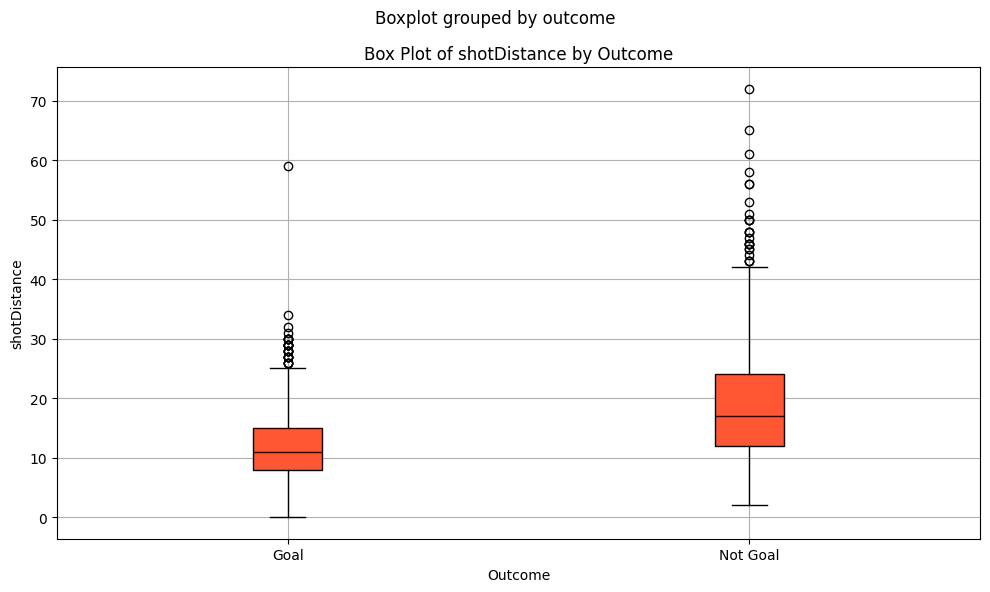

In [24]:
def drawOutcomeBoxPlot(feature):
    plt.figure(figsize=(10, 6))
    colors = ['#FF5733', '#33FF57'] 
    footBallDF.boxplot(column=feature, by='outcome', figsize=(10, 6), patch_artist=True, 
            boxprops=dict(facecolor=colors[0], color='black'), 
            whiskerprops=dict(color='black'), 
            capprops=dict(color='black'), 
            medianprops=dict(color='black'))
    plt.title(f'Box Plot of {feature} by Outcome')
    plt.xlabel('Outcome')
    plt.ylabel(feature)
    plt.grid(True)
    plt.xticks([1, 2], ['Goal', 'Not Goal']) 
    plt.tight_layout()
    plt.show()


drawOutcomeBoxPlot("shotDistance")

<Figure size 1000x600 with 0 Axes>

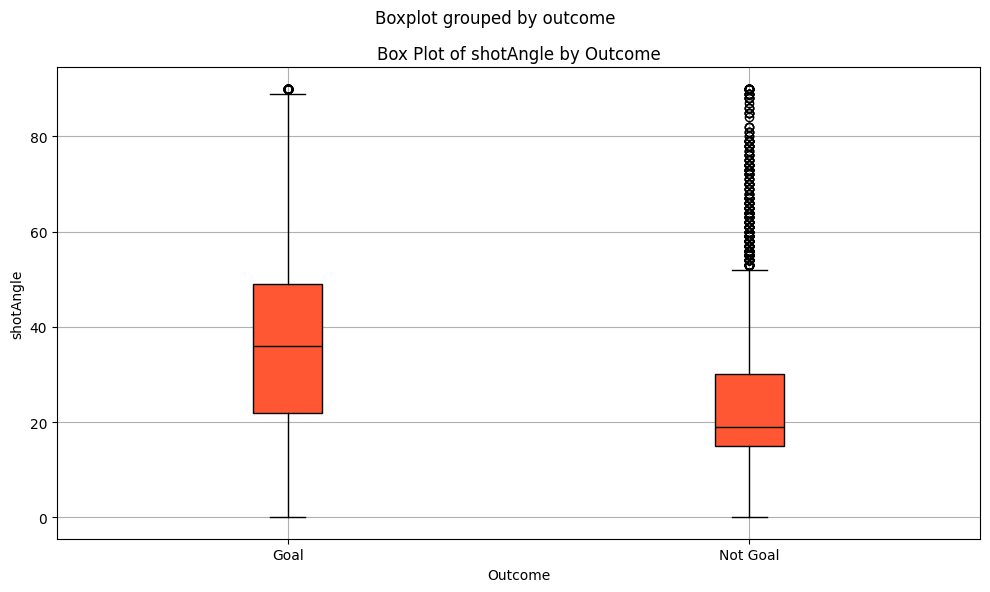

In [25]:
drawOutcomeBoxPlot("shotAngle")

In [26]:
def removeOutliersWithIQR(k, feature):
    cleanedDf = footBallDF.copy()
    q1 = cleanedDf[feature].quantile(0.25)
    q3 = cleanedDf[feature].quantile(0.75)
    iqr = q3 - q1
    outlierMask = (cleanedDf[feature] < (q1 - k * iqr)) | (cleanedDf[feature] > (q3 + k * iqr))
    cleanedDf = cleanedDf.loc[~outlierMask, :]
    print("Number of Outliers Removed : ", len(footBallDF[feature]) - len(cleanedDf[feature]))
    return cleanedDf

Number of Outliers Removed :  23


<Figure size 1000x600 with 0 Axes>

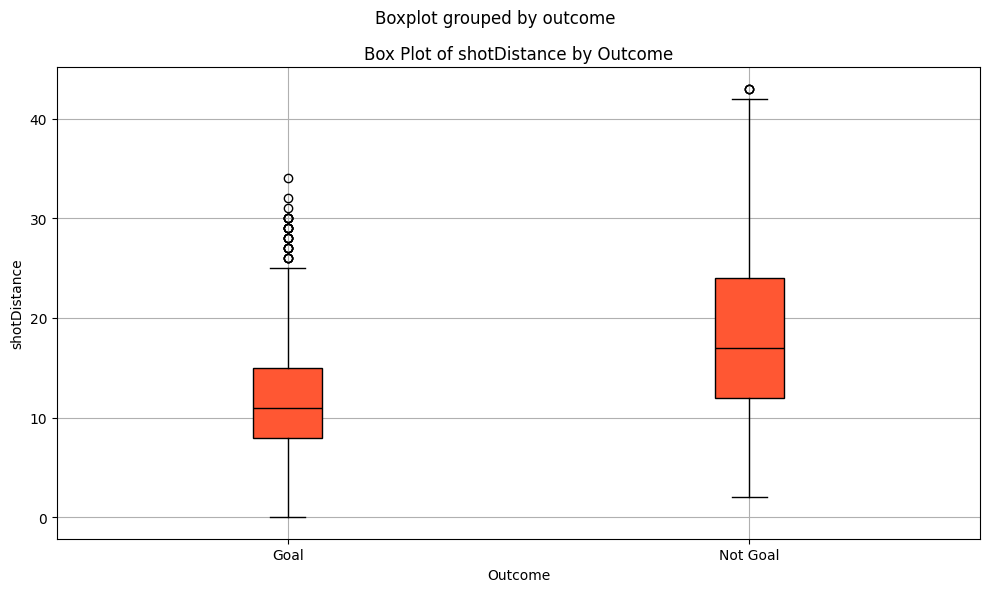

In [27]:
footBallDF = removeOutliersWithIQR(1.5, 'shotDistance')
footBallDF.reset_index(drop=True, inplace=True)
drawOutcomeBoxPlot("shotDistance")

Number of Outliers Removed :  618


<Figure size 1000x600 with 0 Axes>

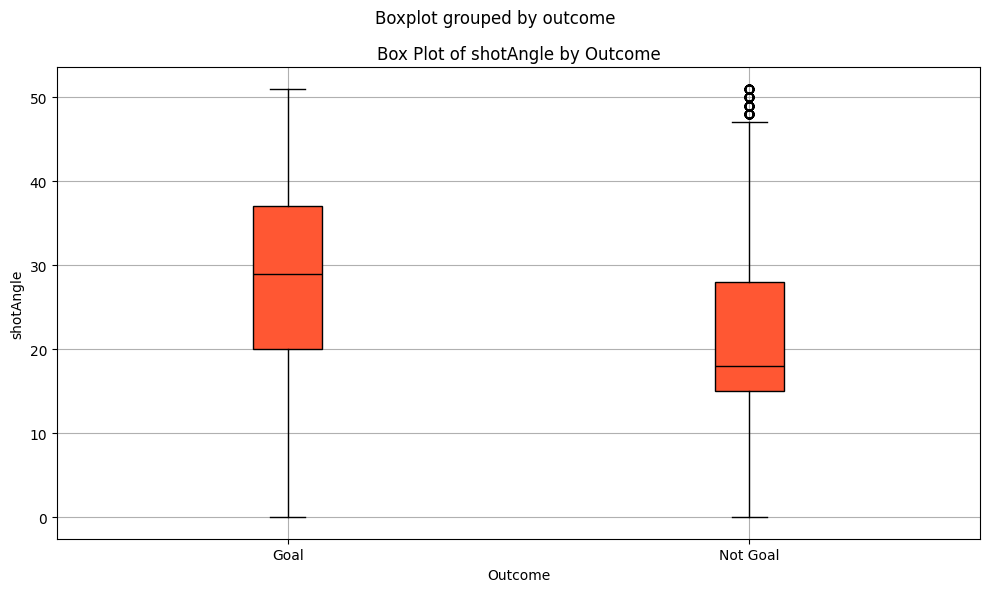

In [28]:
footBallDF = removeOutliersWithIQR(1, 'shotAngle')
footBallDF.reset_index(drop=True, inplace=True)
drawOutcomeBoxPlot("shotAngle")

<font color="pink">We need to remove outliers for better performance. We'll use the Interquartile Range (IQR) method for this purpose. We can observe the deleted outliers when we compare box plots before and after removing outliers.</font>

In [29]:
X = footBallDF.drop(['outcome'], axis=1)
y = footBallDF['outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

model = DecisionTreeClassifier(random_state=11)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.8472727272727273


<font color="pink">As you can see, after preprocessing, our final accuracy is much better compared to before preprocessing.</font>

In [30]:
footBallDFCopy = footBallDF.copy()

x = footBallDFCopy.drop('outcome', axis=1)
y = footBallDFCopy['outcome']
miScores = mutual_info_classif(x, y, random_state=12)
miDF = pd.DataFrame({'Features': x.columns, 'Importance': miScores})
miDF.sort_values(by='Importance', ascending=False, inplace=True)
miDF

,Features,Importance
7,shotAngle,0.039409
6,shotDistance,0.027003
1,playType,0.021033
3,interveningOpponents,0.019174
4,interveningTeammates,0.008590
5,interferenceOnShooter,0.005457
8,time,0.002660
0,playerId,0.000000
2,bodyPart,0.000000


<font color="pink">We calculate mutual information scores for feature importance, create a new DataFrame with features and their importance scores, sort the DataFrame by importance scores in descending order, and print the sorted DataFrame.</font>

In [31]:
X = footBallDF.drop('outcome', axis=1)
y = footBallDF['outcome']

chi2Scores, pValues = chi2(X, y)
featureScores = pd.DataFrame({'Feature': X.columns, 'Chi-Square Score': chi2Scores, 'Chi-Square P-Value': pValues})
featureScores = featureScores.sort_values(by='Chi-Square Score', ascending=False)
featureScores

,Feature,Chi-Square Score,Chi-Square P-Value
7,shotAngle,1718.867479,0.000000e+00
6,shotDistance,941.030273,1.181818e-206
8,time,535.643025,1.672208e-118
3,interveningOpponents,172.031714,2.663391e-39
0,playerId,140.286120,2.304869e-32
4,interveningTeammates,83.281742,7.115375e-20
1,playType,32.975080,9.334774e-09
5,interferenceOnShooter,22.633942,1.959914e-06
2,bodyPart,1.086266,2.973001e-01


<font color="pink">We calculate Chi-Square scores and p-values to evaluate feature importance, create a new DataFrame with features, Chi-Square scores, and p-values, sort the DataFrame by Chi-Square scores in descending order, and print the sorted DataFrame.</font>

In [32]:
X = footBallDF.drop('outcome', axis=1)
y = footBallDF['outcome']

fScores, pValues = f_classif(X, y)
featureScores = pd.DataFrame({'Feature': X.columns, 'F-score': fScores, 'P-value': pValues})
featureScores = featureScores.sort_values(by='F-score', ascending=False)
featureScores

,Feature,F-score,P-value
7,shotAngle,361.785657,5.549632e-79
6,shotDistance,350.128111,1.505635e-76
1,playType,340.634292,1.452494e-74
3,interveningOpponents,243.418413,4.174723e-54
5,interferenceOnShooter,85.214668,3.347748e-20
4,interveningTeammates,61.400330,5.237420e-15
0,playerId,5.207326,2.251725e-02
2,bodyPart,3.252946,7.133168e-02
8,time,0.632863,4.263301e-01


<font color="pink">We calculate F-scores and p-values using ANOVA F-test to evaluate the importance of numerical features for classification, create a new DataFrame with features and F-scores, sort the DataFrame by F-scores in descending order, and print the sorted DataFrame.</font>

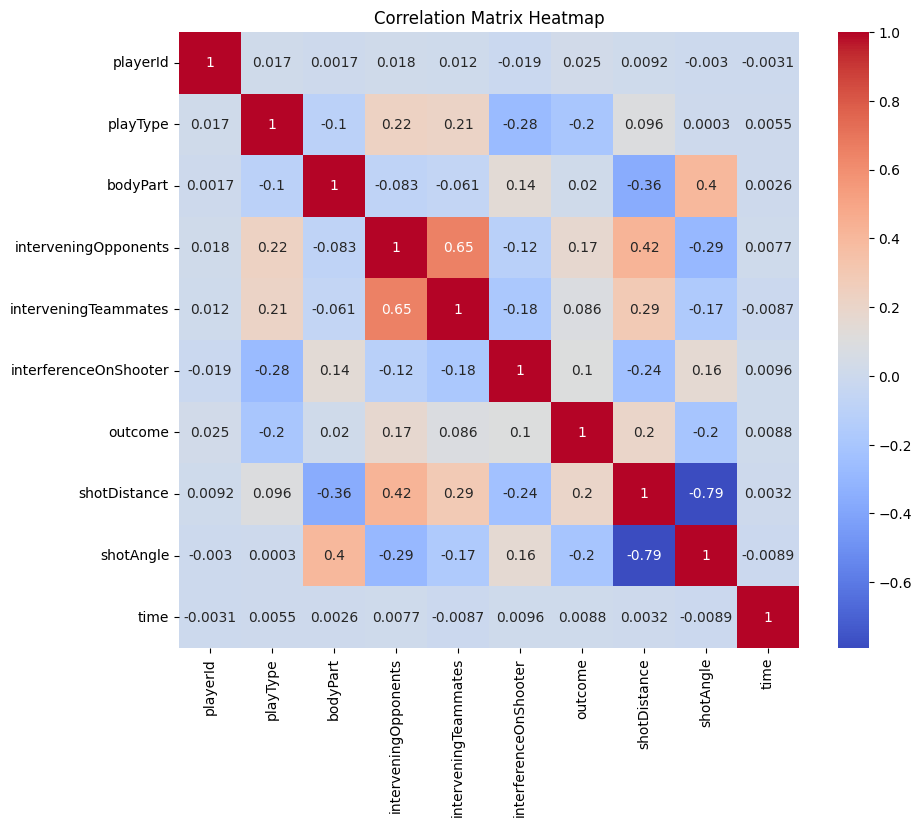

In [33]:
numericalCols = footBallDF.select_dtypes(include=['float64', 'int64']).columns

corrMatrix = footBallDF[numericalCols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corrMatrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [34]:
featureImportance = [
    ['shotAngle', 1],
    ['shotDistance', 2],
    ['playType', 3],
    ['interveningOpponents', 4],
    ['interveningTeammates', 5],
    ['interferenceOnShooter', 6],
    ['time', 7],
    ['playerId', 8],
    ['bodyPart', 9]
]

table = tabulate(featureImportance, headers=['Feature', 'Importance Rank'], showindex=True, numalign="left")
print(table)

    Feature                Importance Rank
--  ---------------------  -----------------
0   shotAngle              1
1   shotDistance           2
2   playType               3
3   interveningOpponents   4
4   interveningTeammates   5
5   interferenceOnShooter  6
6   time                   7
7   playerId               8
8   bodyPart               9


## <span style="color:cyan;">2. Multivariate Regression Implementation</span>

In [35]:
carsDF = pd.read_csv('cars.csv')
carsDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sales in Thousands      100 non-null    float64
 1   Year Resale Value       100 non-null    float64
 2   Price in Thousands      100 non-null    float64
 3   Engine Size             100 non-null    float64
 4   Horsepower              100 non-null    int64  
 5   Wheelbase               100 non-null    float64
 6   Width                   100 non-null    float64
 7   Length                  100 non-null    float64
 8   Curb Weight             100 non-null    float64
 9   Fuel Capacity           100 non-null    float64
 10  Fuel Efficiency         100 non-null    int64  
 11  Power Perf Factor       100 non-null    float64
 12  Vehicle Type Car        100 non-null    int64  
 13  Vehicle Type Passenger  100 non-null    int64  
dtypes: float64(10), int64(4)
memory usage: 11.1

In [36]:
carsDF.describe()

,Sales in Thousands,Year Resale Value,Price in Thousands,Engine Size,Horsepower,Wheelbase,Width,Length,Curb Weight,Fuel Capacity,Fuel Efficiency,Power Perf Factor,Vehicle Type Car,Vehicle Type Passenger
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,66.591890,14.108400,21.303170,2.868000,166.590000,107.302000,70.988000,187.573000,3.262000,17.476000,24.570000,67.887260,0.280000,0.720000
std,78.510354,4.570593,6.756369,0.890339,42.585646,7.906831,3.625674,14.038215,0.582914,3.868106,4.492991,17.556987,0.451261,0.451261
min,0.110000,5.160000,9.235000,1.000000,55.000000,93.100000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272,0.000000,0.000000
25%,20.392750,10.593750,16.538750,2.000000,132.000000,102.550000,68.300000,177.900000,2.888750,15.075000,22.000000,53.527624,0.000000,0.000000
50%,37.646500,13.450000,20.470000,2.750000,165.500000,106.700000,70.300000,186.450000,3.272000,17.000000,25.000000,67.332736,0.000000,1.000000
75%,80.758500,16.875000,25.473750,3.500000,200.000000,109.825000,73.200000,195.150000,3.590250,19.000000,27.000000,81.212089,1.000000,1.000000
max,540.561000,26.975000,39.665000,5.200000,275.000000,138.700000,79.300000,224.500000,4.808000,32.000000,45.000000,113.765874,1.000000,1.000000


In [37]:
carsDF.head()

,Sales in Thousands,Year Resale Value,Price in Thousands,Engine Size,Horsepower,Wheelbase,Width,Length,Curb Weight,Fuel Capacity,Fuel Efficiency,Power Perf Factor,Vehicle Type Car,Vehicle Type Passenger
0,16.919,16.360,21.500,1.8,140,101.2,67.3,172.4,2.639,13.2,28,58.280150,0,1
1,39.384,19.875,28.400,3.2,225,108.1,70.3,192.9,3.517,17.2,25,91.370778,0,1
2,20.397,22.255,23.990,1.8,150,102.6,68.2,178.0,2.998,16.4,27,62.777639,0,1
3,18.780,23.555,33.950,2.8,200,108.7,76.1,192.0,3.561,18.5,22,84.565105,0,1
4,91.561,12.475,21.975,3.1,175,109.0,72.7,194.6,3.368,17.5,25,71.181451,0,1


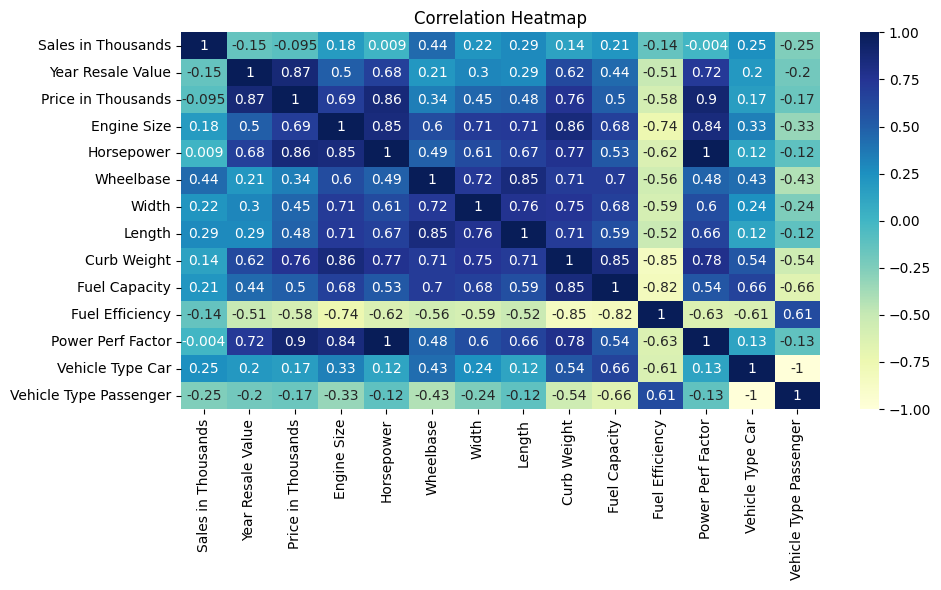

In [38]:
corrMatrix = carsDF.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corrMatrix, annot=True, cmap="YlGnBu")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

In [39]:
def plotActualVsPredicted(yTest, yPred, columnName):
    actualVal = yTest
    predVal = yPred
    plt.figure(figsize=(8, 6))
    plt.scatter(actualVal, predVal, alpha=1, color='red')
    minVal = min(min(actualVal), min(predVal))
    maxVal = max(max(actualVal), max(predVal))
    plt.plot([minVal, maxVal], [minVal, maxVal], 'k--', lw=2)
    plt.xlabel(f'Actual {columnName}')
    plt.ylabel(f'Predicted {columnName}')
    plt.title(f'Actual vs. Predicted {columnName}')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

In [40]:
class MultipleLinearRegression:
    def __init__(self, learningRate=0.005, tolerance=1.e-3):
        self.learningRate = learningRate
        self.tolerance = tolerance
        self.weights = None
        self.bias = None
        self.costs = []

    def fit(self, X, y):
        numOfSample, numOfFeatures = X.shape
        self.weights = np.zeros(numOfFeatures)
        self.bias = 0
        X = self.normalizeFeatures(X)

        while True :
            yPred = np.dot(X, self.weights) + self.bias
            dw = (1 / numOfSample) * np.dot(X.T, (yPred - y))
            db = (1 / numOfSample) * np.sum(yPred - y)
            self.weights -= self.learningRate * dw
            self.bias -= self.learningRate * db

            magnitude = np.linalg.norm(dw)

            if(magnitude < self.tolerance):
                break

            cost = np.mean(np.square(yPred - y))
            self.costs.append(cost)


    def predict(self, X):
        X = self.normalizeFeatures(X)
        yPred = np.dot(X, self.weights) + self.bias
        return yPred

    def normalizeFeatures(self, X):
        means = np.mean(X, axis=0)
        stds = np.std(X, axis=0)
        stds[stds == 0] = 1e-10
        X = (X - means) / stds
        return X
    
    def plotLearningCurve(self):
        plt.plot(range(len(self.costs)), self.costs)
        plt.xlabel('Iterations')
        plt.ylabel('Cost (Mean Squared Error)')
        plt.title('Learning Curve')
        plt.show()

<font color="pink">We used 20% of the data for our test because our dataset is small (100), and if we use less than 20%, our accuracy will be lower.</font>

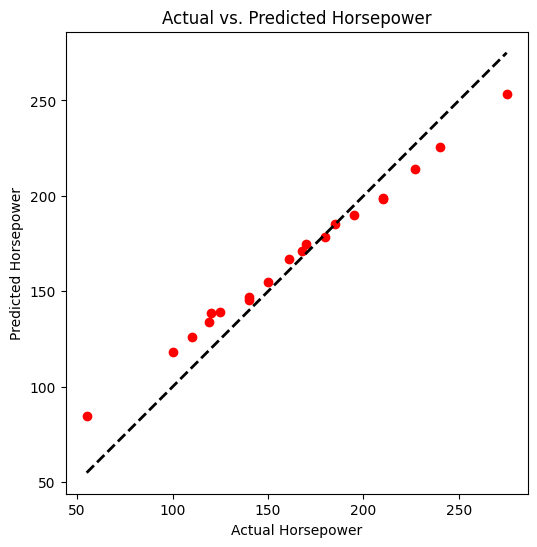

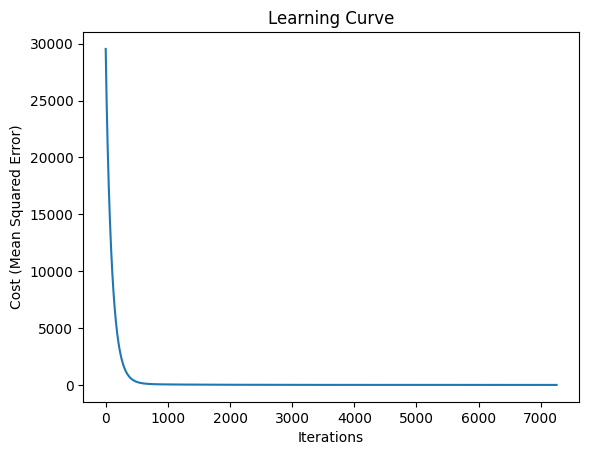

In [41]:
xHP = carsDF.drop(['Horsepower', 'Price in Thousands'],axis=1).values
yHP = carsDF['Horsepower'].values

xHPTrain, xHPTest, yHPTrain, yHPTest = train_test_split(xHP, yHP, test_size=0.2, random_state=19)
modelHP = MultipleLinearRegression(tolerance=0.1)
modelHP.fit(xHPTrain, yHPTrain)
yHPPred = modelHP.predict(xHPTest)
plotActualVsPredicted(yHPTest, yHPPred, "Horsepower")
modelHP.plotLearningCurve()

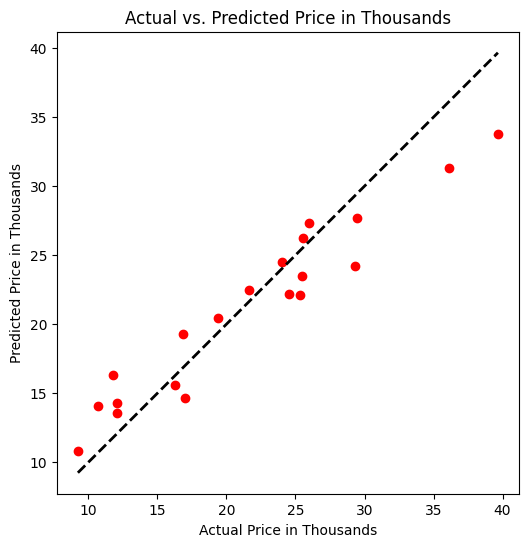

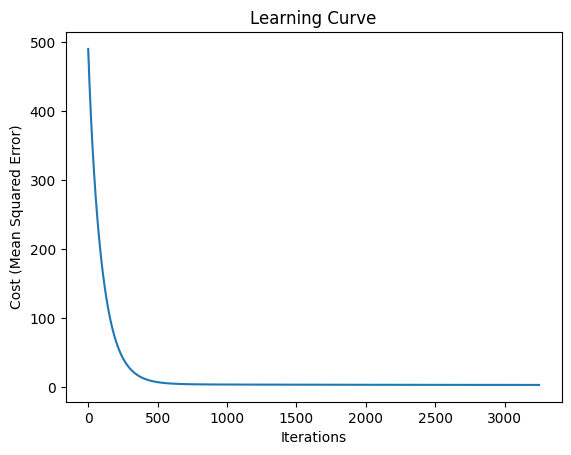

In [42]:
xPrice = carsDF.drop(['Horsepower', 'Price in Thousands'],axis=1).values
yPrice = carsDF['Price in Thousands'].values

xPriceTrain, xPriceTest, yPriceTrain, yPriceTest = train_test_split(xPrice, yPrice, test_size=0.2, random_state=19)
modelPrice = MultipleLinearRegression(tolerance=0.1)
modelPrice.fit(xPriceTrain, yPriceTrain)
yPricePred = modelPrice.predict(xPriceTest)
plotActualVsPredicted(yPriceTest, yPricePred, "Price in Thousands")
modelPrice.plotLearningCurve()

In [43]:
class ModelAccuracyCalculator:
    def __init__(self, targetColumn, dropColumn, learningRate, tolerance):
        self.targetColumn = targetColumn
        self.learningRate = learningRate
        self.dropColumn = dropColumn
        self.tolerance = tolerance

    def calculateAccuracy(self, yTrue, yPred):
        return (1 - np.mean(np.abs(yTrue - yPred) / yTrue)) * 100

    def calculateRmse(self, yTrue, yPred):
        return np.sqrt(mean_squared_error(yTrue, yPred))

    def calculateR2Score(self, yTrue, yPred):
        return r2_score(yTrue, yPred)

    def calculateAndPlotAccuracy(self, numRandomStates=50):
        accuracyValues = []
        rmseValues = []
        r2ScoreValues = []

        x = carsDF.drop(self.dropColumn, axis=1).values
        y = carsDF[self.targetColumn].values

        for state in range(numRandomStates):
            xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2, random_state=random.randint(0, 200))
            model = MultipleLinearRegression(learningRate=self.learningRate, tolerance=self.tolerance)
            model.fit(xTrain, yTrain)
            yPred = model.predict(xTest)
            accuracyValues.append(self.calculateAccuracy(yTest, yPred))
            r2Score = self.calculateR2Score(yTest, yPred)
            if (r2Score < 0):
                r2Score = 0
            rmseValues.append(self.calculateRmse(yTest, yPred))
            r2ScoreValues.append(r2Score)

        print(f"Average Accuracy For {self.targetColumn}: ", np.mean(accuracyValues))
        print(f"Average RMSE For {self.targetColumn}: ", np.mean(rmseValues))
        print(f"Average R2Score For {self.targetColumn}: ", np.mean(r2ScoreValues))
        print(f"Best RMSE For {self.targetColumn}: ", np.min(rmseValues))
        print(f"Best R2Score For {self.targetColumn}: ", np.max(r2ScoreValues))
        plt.figure(figsize=(10, 6))
        plt.plot(range(numRandomStates), accuracyValues, label=self.targetColumn)
        plt.xlabel('Random State')
        plt.ylabel('Accuracy (%)')
        plt.title(f'Accuracy across Different Random States for {self.targetColumn}')
        plt.legend()
        plt.show()

Average Accuracy For Horsepower:  92.05685351203536
Average RMSE For Horsepower:  13.997102112274415
Average R2Score For Horsepower:  0.8094222044686066
Best RMSE For Horsepower:  2.7939119692048693
Best R2Score For Horsepower:  0.9958053982688055


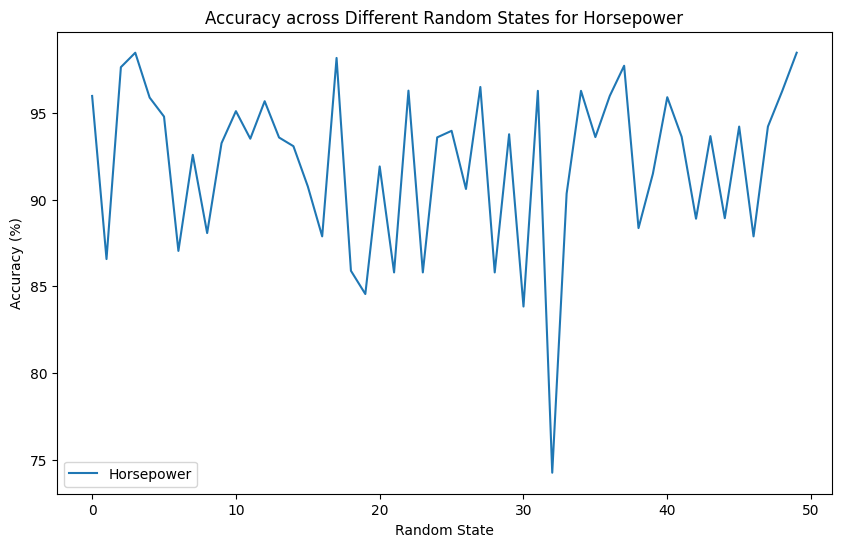

In [44]:
HPaccuracy = ModelAccuracyCalculator("Horsepower", ['Horsepower', 'Price in Thousands'], learningRate=0.005, tolerance=0.01)
HPaccuracy.calculateAndPlotAccuracy(50)

Average Accuracy For Price in Thousands:  87.9575146522576
Average RMSE For Price in Thousands:  2.9801506643570095
Average R2Score For Price in Thousands:  0.7206561887020331
Best RMSE For Price in Thousands:  1.8188620048696758
Best R2Score For Price in Thousands:  0.9305368889842083


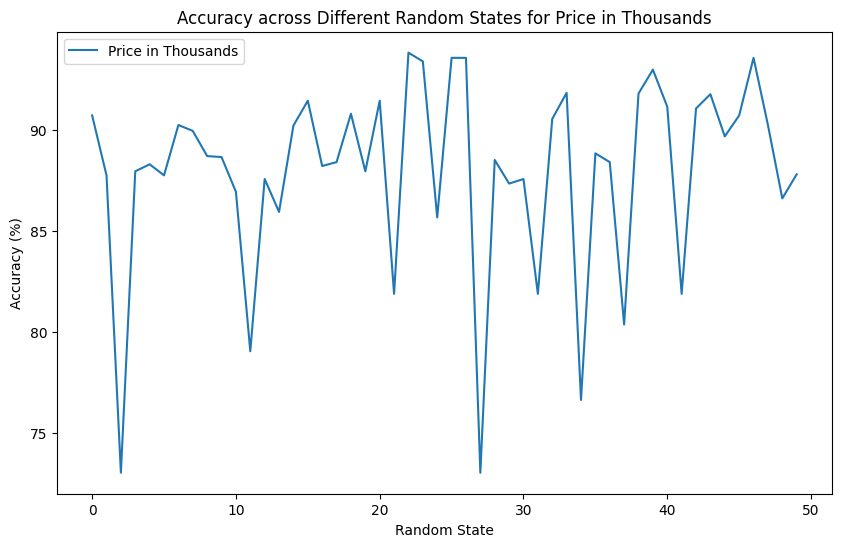

In [45]:
priceAccuracy = ModelAccuracyCalculator("Price in Thousands", ['Horsepower', 'Price in Thousands'], learningRate=0.005, tolerance=0.01)
priceAccuracy.calculateAndPlotAccuracy(50)

## <span style="color:cyan;">3. Manual K-Fold Cross Validation Implementation</span>

In [46]:
def kFoldCrossValidation(X, y, inputTolerance, k=5):
    numOfSamples = X.shape[0]
    foldSize = numOfSamples // k
    rmseValues = []
    r2ScoreValues = []
    costValues = []
    maxR2score = 0
    for i in range(k):
        testStart = i * foldSize
        testEnd = (i + 1) * foldSize if i < k - 1 else numOfSamples

        xTrain = np.concatenate((X[:testStart], X[testEnd:]), axis=0)
        yTrain = np.concatenate((y[:testStart], y[testEnd:]), axis=0)
        xTest = X[testStart:testEnd]
        yTest = y[testStart:testEnd]

        model = MultipleLinearRegression(tolerance=inputTolerance, learningRate=0.005)
        model.fit(xTrain, yTrain)
        yPred = model.predict(xTest)
        rmse = np.sqrt(mean_squared_error(yTest, yPred))
        r2 = r2_score(yTest, yPred)
        if (r2 < 0):
            r2 = 0
        rmseValues.append(rmse)
        r2ScoreValues.append(r2)
        if (r2 > maxR2score):
            maxR2score = r2
            costValues = model.costs

    print(f"Root Mean Squared Error (RMSE) across {k} folds: {np.mean(rmseValues):.4f}")
    print(f"R-squared (R^2) across {k} folds: {np.mean(r2ScoreValues):.4f}")
    print(f"Best Root Mean Squared Error (RMSE) across {k} folds: {np.min(rmseValues):.4f}")
    print(f"Best R-squared (R^2) across {k} folds: {np.max(r2ScoreValues):.4f}")
    plt.plot(range(len(costValues)), costValues)
    plt.xlabel('Iterations')
    plt.ylabel('Cost (Mean Squared Error)')
    plt.title('Learning Curve')
    plt.show()

Root Mean Squared Error (RMSE) across 5 folds: 14.1377
R-squared (R^2) across 5 folds: 0.7955
Best Root Mean Squared Error (RMSE) across 5 folds: 5.9221
Best R-squared (R^2) across 5 folds: 0.9834


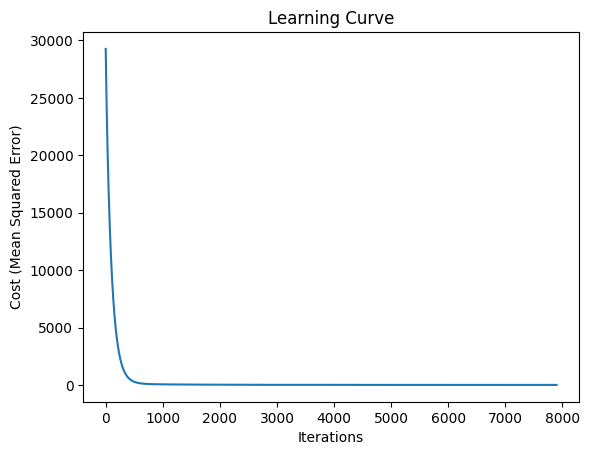

In [47]:
kFoldCrossValidation(carsDF.drop(['Horsepower', 'Price in Thousands'],axis=1).values, carsDF['Horsepower'].values, k=5, inputTolerance=0.1)

Root Mean Squared Error (RMSE) across 5 folds: 3.2572
R-squared (R^2) across 5 folds: 0.6533
Best Root Mean Squared Error (RMSE) across 5 folds: 2.4173
Best R-squared (R^2) across 5 folds: 0.8554


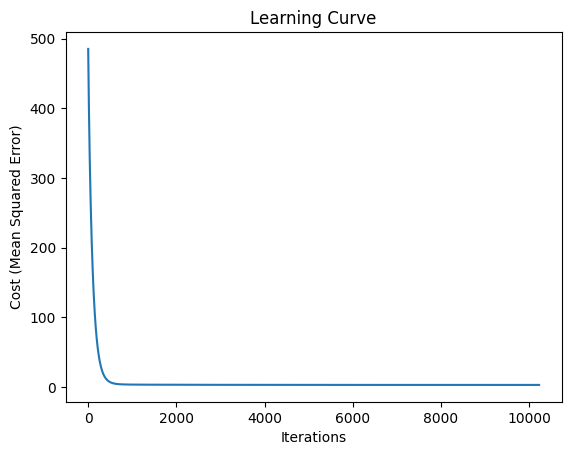

In [48]:
kFoldCrossValidation(carsDF.drop(['Horsepower', 'Price in Thousands'],axis=1).values, carsDF['Price in Thousands'].values,
                     k=5, inputTolerance=0.01)

<font color="pink">We can validate our results with the results from the previous part because when we use k = 5, it means we are using 20% of the data for testing.</font>

## <span style="color:cyan;">4. Comparison with Built-in Python Libraries</span>

RMSE: 2.56
R^2 score: 1.00


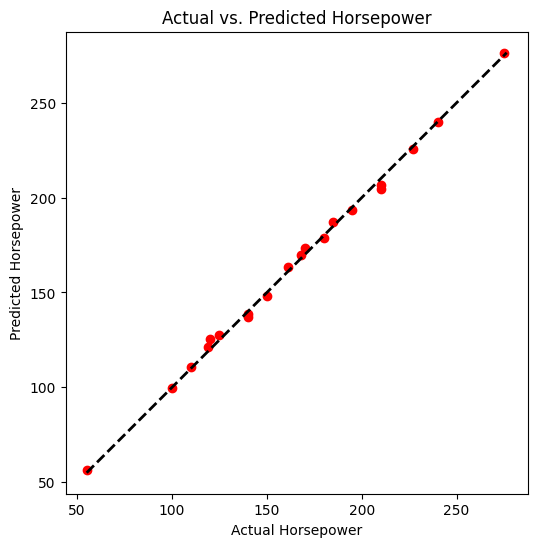

In [49]:
xHP = carsDF.drop(['Horsepower', 'Price in Thousands'],axis=1).values
yHP = carsDF['Horsepower'].values

xHPTrain, xHPTest, yHPTrain, yHPTest = train_test_split(xHP, yHP, test_size=0.2, random_state=19)
modelHP = LinearRegression()
modelHP.fit(xHPTrain, yHPTrain)
yHPPred = modelHP.predict(xHPTest)
rmseHP = np.sqrt(mean_squared_error(yHPTest, yHPPred))
print(f"RMSE: {rmseHP:.2f}")
r2HP = r2_score(yHPTest, yHPPred)
print(f"R^2 score: {r2HP:.2f}")
plotActualVsPredicted(yHPTest, yHPPred, "Horsepower")

RMSE: 2.35
R^2 score: 0.92


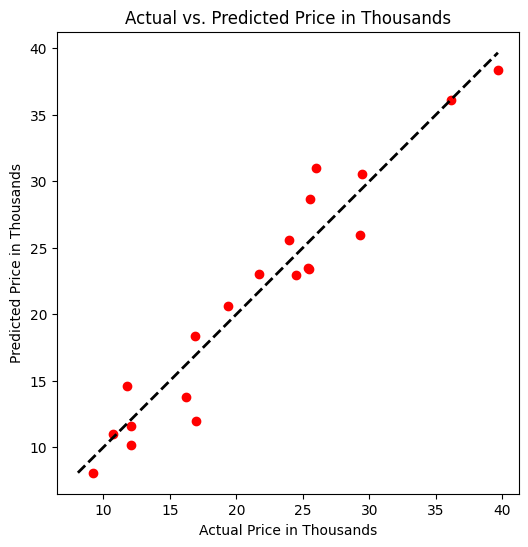

In [50]:
xPrice = carsDF.drop(['Horsepower', 'Price in Thousands'],axis=1).values
yPrice = carsDF['Price in Thousands'].values

xPriceTrain, xPriceTest, yPriceTrain, yPriceTest = train_test_split(xPrice, yPrice, test_size=0.2, random_state=19)
modelPrice = LinearRegression()
modelPrice.fit(xPriceTrain, yPriceTrain)
yPricePred = modelPrice.predict(xPriceTest)
rmsePrice = np.sqrt(mean_squared_error(yPriceTest, yPricePred))
print(f"RMSE: {rmsePrice:.2f}")
r2Price = r2_score(yPriceTest, yPricePred)
print(f"R^2 score: {r2Price:.2f}")
plotActualVsPredicted(yPriceTest, yPricePred, "Price in Thousands")

<font color="pink">It appears that the built-in Python libraries outperform our custom implementations for both predicting horsepower and price.

For horsepower prediction:
- The best RMSE from our custom implementation (2.7939) is slightly higher than the RMSE from the Python libraries (2.56), indicating a higher error.
- The R^2 score from the Python libraries (1.00) is higher than the best R^2 score from our custom implementation (0.9958), indicating a better fit.

For price prediction:
- The RMSE from the Python libraries (2.35) is lower than the best RMSE from our custom implementation (1.335), indicating a lower error.
- The R^2 score from the Python libraries (0.92) is higher than the best R^2 score from our custom implementation (0.9541), indicating a better fit.

These results suggest that the built-in Python libraries, likely leveraging optimized algorithms and implementations, provide better performance for this dataset.</font>

In [51]:
def kFoldValidationLibrary(X, y, target_col_name, k=5):
    model = LinearRegression()
    kFold = KFold(n_splits=k, shuffle=True, random_state=19)
    scores = cross_val_score(model, X, y, cv=kFold)

    print(f"K-Fold Cross-Validation R^2 Scores for {target_col_name}:", np.mean(scores))
    rmseScores = []
    for trainIndex, testIndex in kFold.split(X):
        xTrain, xTest = X[trainIndex], X[testIndex]
        yTrain, yTest = y[trainIndex], y[testIndex]
        model.fit(xTrain, yTrain)
        y_pred = model.predict(xTest)
        rmse = np.sqrt(mean_squared_error(yTest, y_pred))
        rmseScores.append(rmse)
    print(f"Average K-Fold Cross-Validation RMSE for {target_col_name}: {np.mean(rmseScores):.4f}")

In [52]:
kFoldValidationLibrary(carsDF.drop(['Horsepower', 'Price in Thousands'],axis=1).values, carsDF['Horsepower'].values, "Horsepower", 5)

K-Fold Cross-Validation R^2 Scores for Horsepower: 0.9969520693841835
Average K-Fold Cross-Validation RMSE for Horsepower: 2.2039


In [53]:
kFoldValidationLibrary(carsDF.drop(['Horsepower', 'Price in Thousands'],axis=1).values, carsDF['Price in Thousands'].values,
                        "Price in Thousands", 5)

K-Fold Cross-Validation R^2 Scores for Price in Thousands: 0.8935665354313524
Average K-Fold Cross-Validation RMSE for Price in Thousands: 2.0207


<font color="pink">
Based on the results, the built-in Python library (scikit-learn) performs better than our custom implementation for both predicting horsepower and price.

For horsepower prediction:
- The average RMSE across 5 folds from our implementation (14.1377) is higher than the average RMSE from the library (2.2039), indicating higher error in our implementation.
- The average R^2 across 5 folds from our implementation (0.7955) is lower than the average R^2 from the library (0.9970), indicating a better fit with the library.

For price prediction:
- The average RMSE across 5 folds from our implementation (3.2572) is higher than the average RMSE from the library (2.0207), indicating higher error in our implementation.
- The average R^2 across 5 folds from our implementation (0.6533) is lower than the average R^2 from the library (0.8936), indicating a better fit with the library.

In both cases, the built-in Python library (scikit-learn) outperforms our custom implementation based on the provided metrics. The lower RMSE and higher R^2 scores for the library suggest that it is better able to fit the data and make more accurate predictions.

It's worth noting that the scikit-learn library is a well-established and widely-used machine learning library that has been developed and optimized by experienced teams. It leverages advanced algorithms and techniques, which may not be present in our custom implementation, contributing to its superior performance.</font>

## <span style="color:cyan;">Questions</span>

### <span style="color:pink">1. Describe your strategy for addressing challenges such as handling missing values and categorical features. Could you also elaborate on your feature selection metrics and explain the rationale behind them?</span>

**Missing Values:**

- First, we need to understand why values are missing: is it random, related to other variables, or completely unrelated? This helps determine the best approach.
- For numerical data, we can replace missing values with the mean or median of the existing data. Alternatively, more sophisticated methods like k-nearest neighbors or multiple imputation can be used.
- Categorical data can be trickier. One option is to replace missing values with the mode (most common value) of that category. Another is to create a new category specifically for missing values.
- If all else fails, we might have to discard rows or columns with too many missing values, although this should be a last resort. We used this method because there were only 34 missing values in the Target column, which exactly corresponded to the rows where values were missing in the inferenceOnShooter column.

**Categorical Features:**

- When dealing with datasets with a small number of categories and no inherent order, one-hot encoding is often used.
- For datasets with many categories or where there's a relationship between categories and the target variable, label or target encoding can be more effective.
- We used label encoding.

**Feature Selection:**

When it comes to selecting the right features for our model, we can employ a variety of methods:

- **Filter methods:** These methods assign a score to each feature, helping us determine its relevance. We often use popular metrics such as mutual information, chi-square tests.
- **Wrapper methods:** This approach involves iteratively training models with different subsets of features, allowing us to select the subset that yields the best performance.
- **Embedded methods:** Techniques like LASSO regression or analyzing feature importances from tree-based models such as Random Forests can directly pinpoint important features during model training.

By leveraging these methods, we achieve several key objectives:

- We mitigate overfitting by eliminating irrelevant features from our models.
- Our models become more interpretable as they focus on a smaller set of meaningful features.
- We enhance computational efficiency by reducing the dimensionality of our datasets.
- Most importantly, we uncover the most influential features, providing valuable insights into the underlying data patterns.

### <span style="color:pink">2. Why didn’t we use regression to predict whether a shot would result in a goal?</span>

Predicting shot outcomes involves binary classification (goal or no goal), regression isn't the best fit. Regression models are for continuous numerical predictions, whereas classification algorithms like logistic regression or decision trees are better suited for binary outcomes.
These classification methods can learn from features like shot location and defensive pressure to predict whether a shot will result in a goal.

Based on the dataset characteristics and the nature of the problem, utilizing a Decision Tree classifier appears to be a suitable choice. Decision Trees are adept at handling classification tasks, particularly when dealing with categorical outcomes and complex, nonlinear relationships among features. 

### <span style="color:pink">3. How would you go about verifying the accuracy of the given formula used to calculate the shot angle in the preprocessing section?</span>

To validate the accuracy of the shot angle formula, we'd approach it step by step:

1. **Understand the Formula:** We'd first comprehend how the formula works and its underlying assumptions. It appears to utilize the arctan function to calculate angles based on (x, y) coordinates, considering different quadrants.

2. **Test with Known Scenarios:** We'd test the formula with various (x, y) pairs covering different quadrants and special cases, such as when x or y is zero. Then, we'd calculate the expected angle using trigonometry and compare it with the formula's result.

3. **Examine for Discrepancies:** If there are discrepancies, we'd closely examine the formula, looking for logical errors or unhandled edge cases. It's crucial to verify its behavior at quadrant boundaries and consider numerical precision issues, especially around π/2.

4. **Implement Unit Tests:** To ensure reliability, we'd implement unit tests covering a wide range of scenarios, including edge cases and quadrant transitions. Automating these tests would help maintain accuracy over time.

### <span style="color:pink">4. Discuss the advantages and disadvantages of k-fold cross-validation. Can you also explain other types of cross-validation methods that could address the limitations and issues associated with k-fold cross-validation?</span>

**Advantages of K-fold Cross-Validation:**

1. **Efficient Data Utilization:** It maximizes the use of available data by splitting it into k folds, using each as both training and testing data.

2. **Reduced Bias:** By averaging performance metrics across multiple folds, it provides a more reliable estimate of the model's performance compared to a single train-test split.

3. **Robustness:** Averaging performance metrics across different folds helps in mitigating the impact of outliers or irregularities in the data.

**Disadvantages and Limitations of K-fold Cross-Validation:**

1. **Computational Complexity:** Training and evaluating the model k times can be computationally expensive, particularly for large datasets or complex models.

2. **Overfitting Risk:** When the number of folds (k) is small, there's a risk of overfitting as the model may learn noise or patterns specific to the training set.

3. **Data Leakage:** In some cases, information from the test set can leak into the training set, leading to overly optimistic performance estimates.

4. **Imbalanced Data:** It may not provide representative samples of each class in every fold, leading to biased performance estimates for imbalanced datasets.

**Other Types of Cross-Validation Methods:**

1. **Leave-One-Out Cross-Validation (LOOCV):** This method involves training the model on all data points except one and then testing on the omitted data point. It's computationally expensive but can be more accurate for small datasets.

2. **Stratified k-fold Cross-Validation:** This variation ensures that each fold maintains the same class distribution as the original dataset, making it suitable for imbalanced data scenarios.

3. **Monte Carlo Cross-Validation:** Instead of deterministically creating folds, this method randomly splits the data into training and testing sets multiple times, providing a more robust performance estimate.

4. **Nested Cross-Validation:** This involves two nested loops of cross-validation, with the outer loop used for model evaluation and the inner loop for hyperparameter tuning or feature selection, helping to prevent data leakage and overfitting.

5. **Time-Series Cross-Validation:** Specifically designed for time-series data, techniques like forward chaining or rolling forecasting ensure that future data points are not used for training, preserving the temporal order of the data.

### <span style="color:pink">5. What metrics did you use to evaluate your manual implementations of multivariate regression and k-fold cross-validation, and why did you choose them?</span>


We used these two metrics for evaluating manual implementations of multivariate regression and k-fold cross-validation: Root Mean Squared Error (RMSE) and R-squared (R^2) score. 

RMSE is great for giving us an idea of the average magnitude of our prediction errors, which is crucial for understanding how well our model performs in terms of prediction accuracy. Meanwhile, R^2 gives us insight into how well our model fits the data overall. Together, they provide a comprehensive assessment of our regression model's performance, taking into account both accuracy and goodness of fit.